In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('MARUTI.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,09-07-2003,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.840000e+14,NaN,8537695.0,0.2428
1,10-07-2003,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.740000e+14,NaN,4363947.0,0.4170
2,11-07-2003,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.020000e+14,NaN,3014852.0,0.2568
3,12-07-2003,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.060000e+14,NaN,1949217.0,0.3258
4,13-07-2003,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.090000e+14,NaN,1307694.0,0.2118


In [4]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.000000,4305.00000,4.305000e+03,4.305000e+03,2334.000000,4.304000e+03,4304.000000
mean,2800.152033,2803.934472,2837.747433,2767.077549,2801.459350,2801.740918,2802.90236,1.197402e+06,2.235914e+14,53090.723650,3.630305e+05,0.389290
std,2676.753584,2681.161552,2704.761111,2652.623803,2677.026421,2677.195355,2678.71221,1.658447e+06,2.733851e+14,43157.684861,3.716069e+05,0.158008
min,125.000000,164.000000,168.700000,155.000000,164.000000,164.300000,165.06000,2.279600e+04,2.130000e+12,1096.000000,4.896000e+03,0.034300
25%,811.250000,815.000000,829.950000,796.250000,812.200000,812.450000,813.51000,4.216340e+05,6.140000e+13,22120.500000,1.604108e+05,0.269275
50%,1390.700000,1391.550000,1412.000000,1370.250000,1390.000000,1390.800000,1391.64000,6.831620e+05,1.080000e+14,41441.500000,2.695125e+05,0.393250
75%,4606.550000,4600.000000,4645.950000,4557.250000,4612.650000,4606.900000,4602.97000,1.204104e+06,2.900000e+14,68543.250000,4.482765e+05,0.503725
max,9832.450000,9966.000000,9996.400000,9725.000000,9846.000000,9832.450000,9850.96000,3.516428e+07,4.880000e+15,407715.000000,8.537695e+06,1.000000


In [6]:
df_1=df.drop(columns=['Turnover','Trades','Deliverable Volume','%Deliverble','Last','Prev Close','Series','Symbol','VWAP'])

In [7]:
df_1

,Date,Open,High,Low,Close,Volume
0,09-07-2003,164.90,170.40,155.00,164.30,35164283
1,10-07-2003,167.00,168.70,164.50,167.00,10464179
2,11-07-2003,167.75,174.85,166.25,173.35,11740117
3,12-07-2003,174.25,179.25,174.25,177.95,5982324
4,13-07-2003,200.00,200.00,173.00,176.20,6173689
...,...,...,...,...,...,...
4300,26-10-2020,7100.00,7161.30,6935.05,7054.80,1559361
4301,27-10-2020,7067.00,7209.75,7053.00,7158.40,1461819
4302,28-10-2020,7194.95,7332.00,7110.00,7186.05,1645177
4303,29-10-2020,7114.00,7199.00,6986.70,7117.70,1434853


In [8]:
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d-%m-%Y')

In [9]:
# WE USE TO FILL THE NULL VALUES USING FORWARD FILLING MEANS FILL THE EMPTY COLUMN WITH THE VALUE JUST ABOVE THE COLUMN
# WE CAN USE BACKWARD FILLING AS WELL OR THE AVERAGE OF PREVIOUS 7 DAYS.
df_1=df_1.fillna(method='ffill')

C:\Users\Akash Ranjan Sinha\AppData\Local\Temp\ipykernel_4724\2897749962.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_1=df_1.fillna(method='ffill')


In [10]:
#No Null Values  
df_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df_1

,Date,Open,High,Low,Close,Volume
0,2003-07-09,164.90,170.40,155.00,164.30,35164283
1,2003-07-10,167.00,168.70,164.50,167.00,10464179
2,2003-07-11,167.75,174.85,166.25,173.35,11740117
3,2003-07-12,174.25,179.25,174.25,177.95,5982324
4,2003-07-13,200.00,200.00,173.00,176.20,6173689
...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853


E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


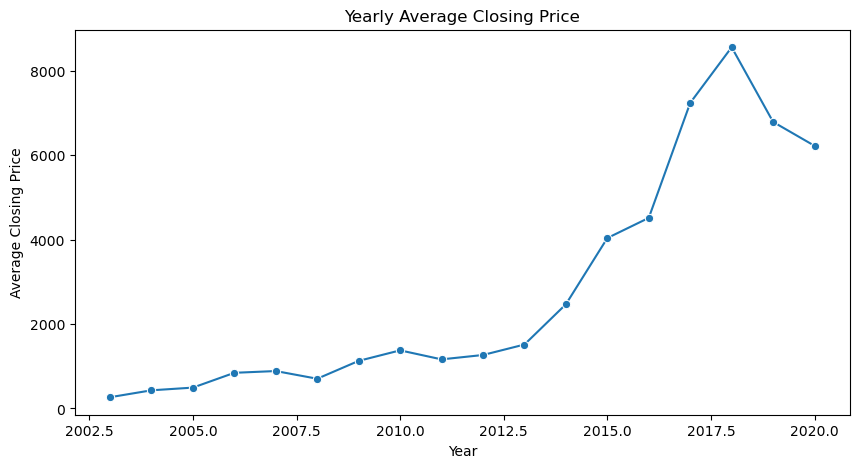

In [12]:
df_1['Year'] = df_1['Date'].dt.year
yearly_avg = df_1.groupby('Year')['Close'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', linestyle='-')
plt.title('Yearly Average Closing Price')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.show()

In [13]:
max_avg_close_1 = yearly_avg.max()
max_avg_close_1

8555.311382113821

In [14]:
# We can see that max value means average is in year 2018 and min is in year 2003
yearly_avg

Year
2003     266.353226
2004     430.044685
2005     493.976693
2006     844.544600
2007     886.245984
2008     704.080285
2009    1127.081481
2010    1376.187698
2011    1162.869838
2012    1266.317928
2013    1514.121000
2014    2467.256762
2015    4035.868145
2016    4513.622065
2017    7236.697379
2018    8555.311382
2019    6786.344694
2020    6220.069524
Name: Close, dtype: float64

In [15]:
df_1['month'] = df_1['Date'].dt.month
monthly_avg = df_1.groupby(['Year','month'])['Close'].mean()

In [16]:
monthly_avg

Year  month
2003  7         173.600000
      8         213.777500
      9         220.127273
      10        270.610870
      11        338.267500
                  ...     
2020  6        5704.211364
      7        6021.780435
      8        6782.669048
      9        6909.379545
      10       6981.495238
Name: Close, Length: 208, dtype: float64

In [17]:
# We get to know that on january 2018 the value of stock is highest and is 9421
max_idx = monthly_avg.idxmax()
max_avg_close = monthly_avg.max()
max_year, max_month = max_idx
print(max_year,max_month,max_avg_close)

2018 1 9421.163636363637


In [18]:
# We get to know that on july 2003 the value of stock is lowest and is 173.6
min_idx = monthly_avg.idxmin()
min_avg_close = monthly_avg.min()
min_year, min_month = min_idx
print(min_year,min_month,min_avg_close)

2003 7 173.6


In [19]:
df_1=df_1.drop(columns=['Year','month'])

In [20]:
df_1

,Date,Open,High,Low,Close,Volume
0,2003-07-09,164.90,170.40,155.00,164.30,35164283
1,2003-07-10,167.00,168.70,164.50,167.00,10464179
2,2003-07-11,167.75,174.85,166.25,173.35,11740117
3,2003-07-12,174.25,179.25,174.25,177.95,5982324
4,2003-07-13,200.00,200.00,173.00,176.20,6173689
...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853


E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


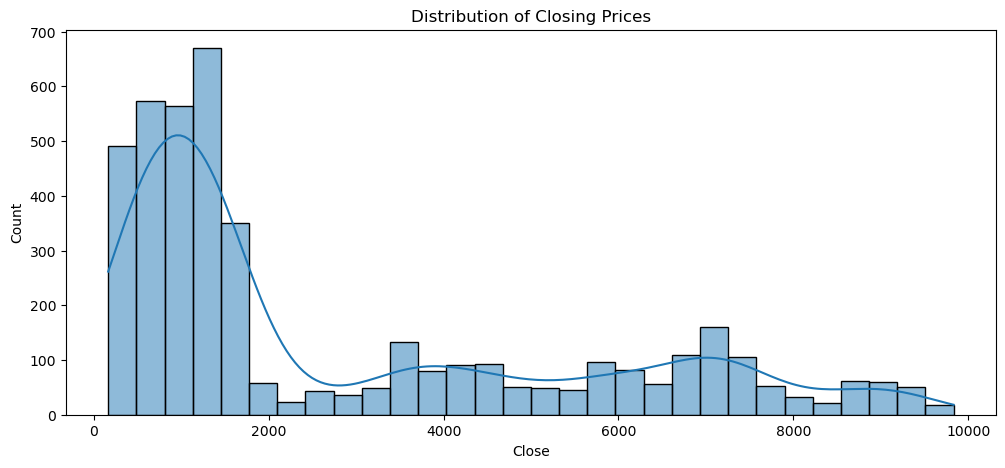

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(df_1['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

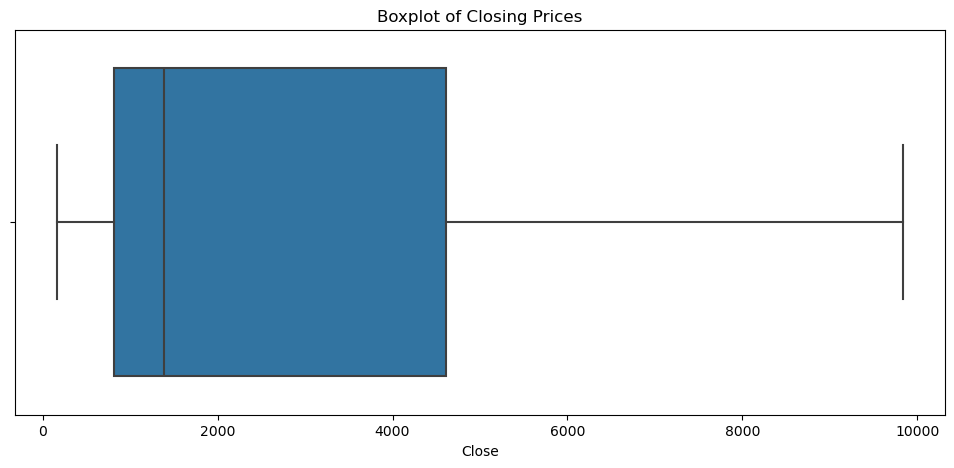

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_1['Close'])
plt.title('Boxplot of Closing Prices')
plt.show()

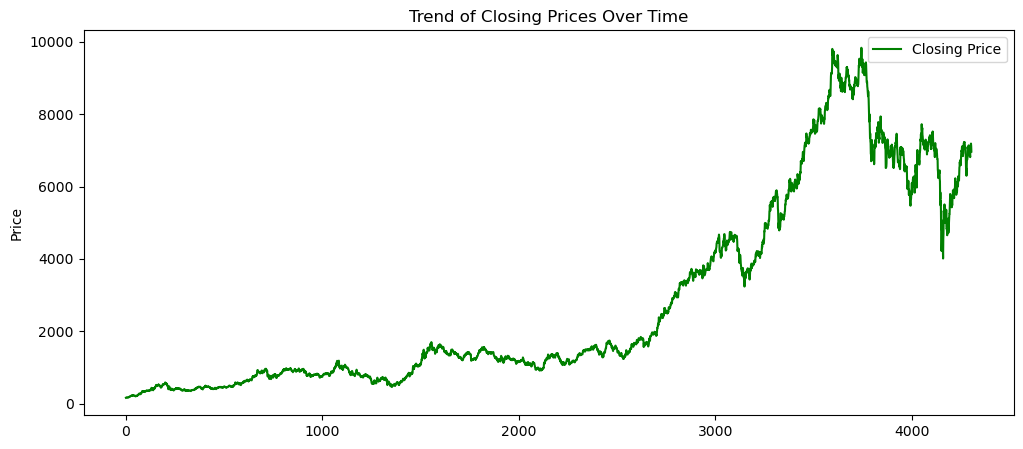

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Closing Price', color='green')
plt.title('Trend of Closing Prices Over Time')
plt.ylabel('Price')
plt.legend()
plt.show()

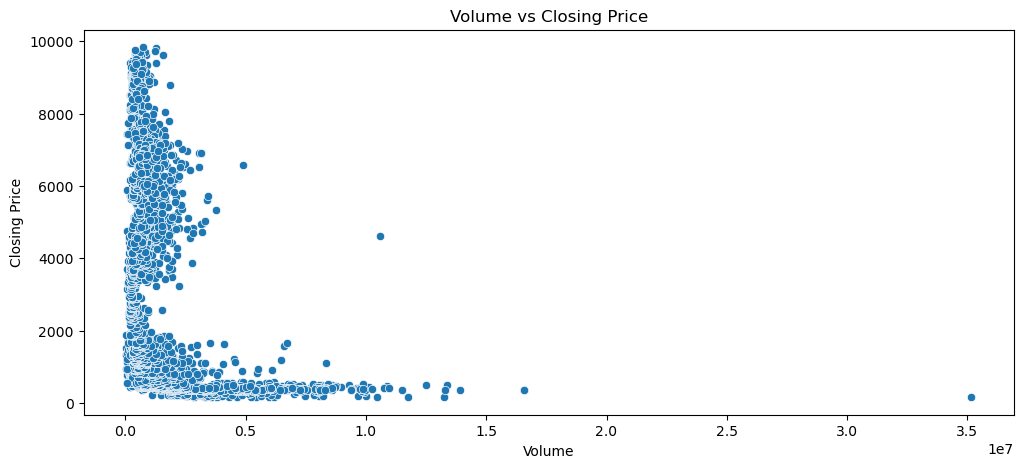

In [24]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

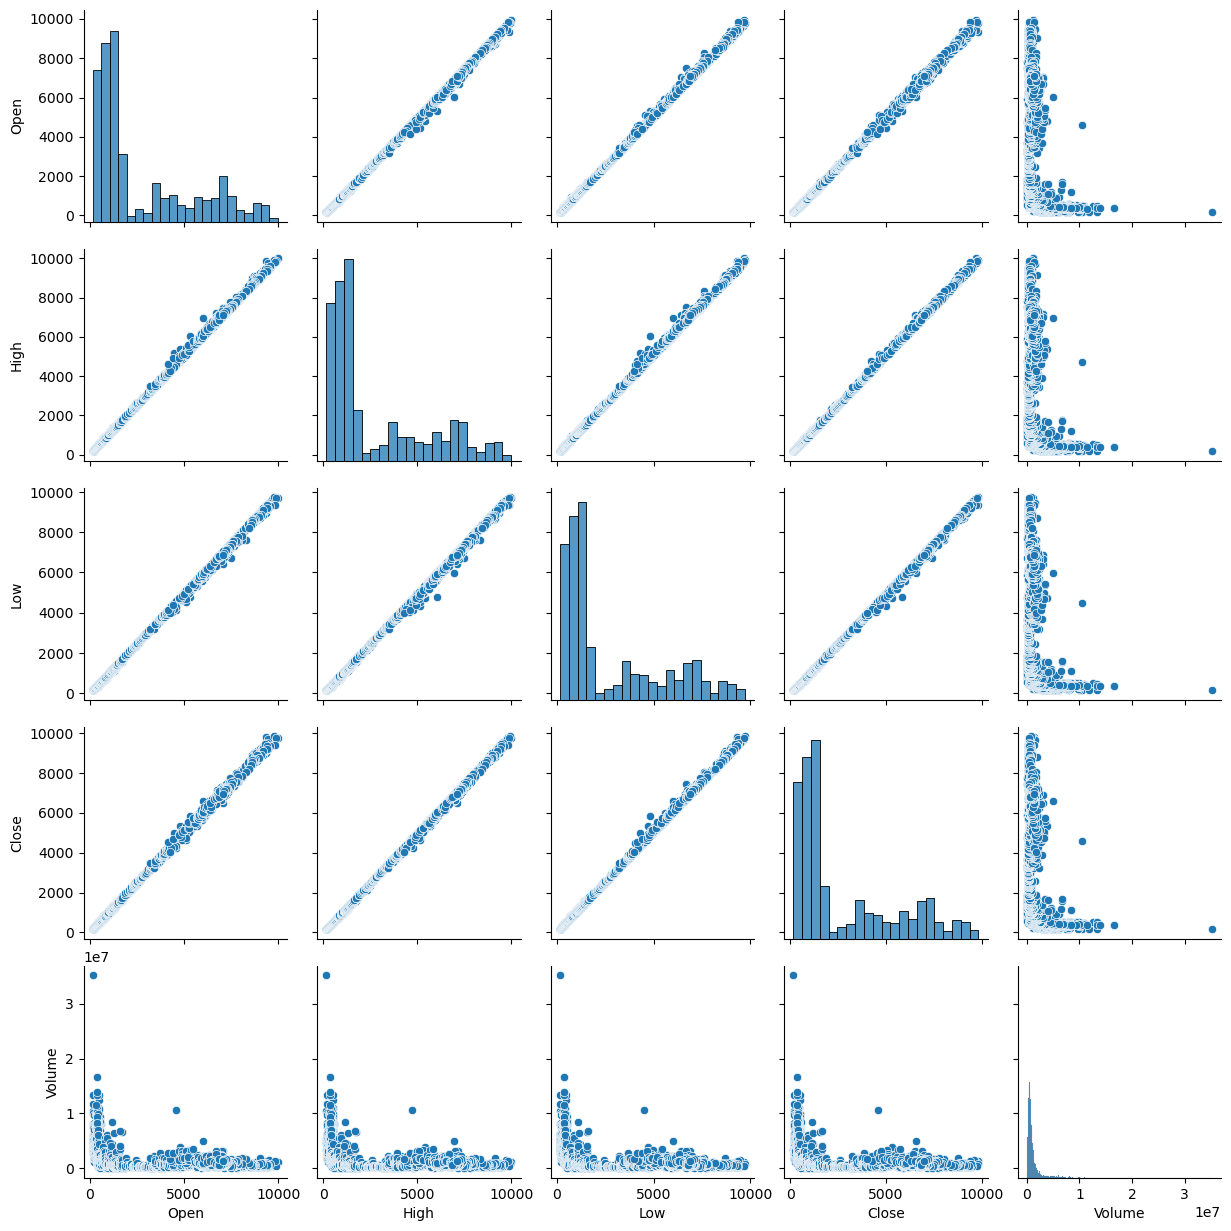

In [25]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])

E:\ANACONDA\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


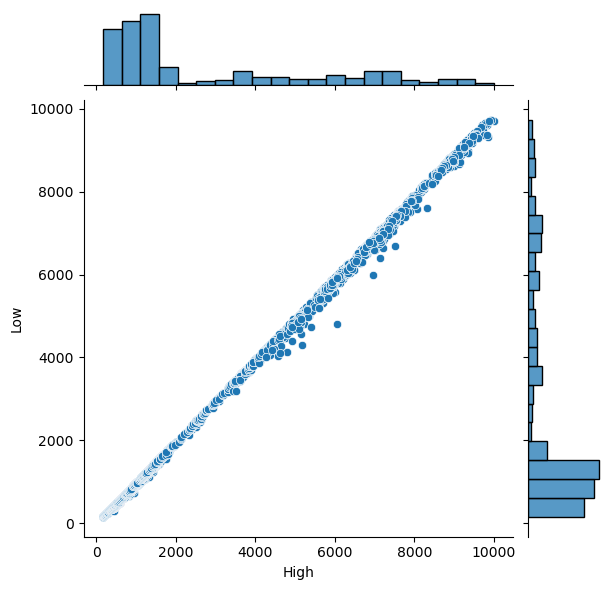

In [26]:
sns.jointplot(x=df['High'], y=df['Low'], kind='scatter', cmap='coolwarm')

In [27]:
import statsmodels.api as sms

In [28]:
from statsmodels.tsa.stattools import adfuller,acf, pacf

In [29]:
df_1

,Date,Open,High,Low,Close,Volume
0,2003-07-09,164.90,170.40,155.00,164.30,35164283
1,2003-07-10,167.00,168.70,164.50,167.00,10464179
2,2003-07-11,167.75,174.85,166.25,173.35,11740117
3,2003-07-12,174.25,179.25,174.25,177.95,5982324
4,2003-07-13,200.00,200.00,173.00,176.20,6173689
...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853


In [30]:
def find_optimal_differencing(series, max_d=3):
    for d in range(max_d + 1):
        temp_series = series.diff(d).dropna() if d > 0 else series
        adf_result = adfuller(temp_series)
        p_value = adf_result[1]
        print(f'Order of Differencing: {d}, ADF Statistic: {adf_result[0]}, p-value: {p_value}')
        if p_value <= 0.05:
            print(f"Optimal differencing order found: d = {d}")
            return d
    print("Data may still not be stationary after max_d differencing.")
    return max_d

optimal_d = find_optimal_differencing(df_1['Close'])

Order of Differencing: 0, ADF Statistic: -0.5968301263096801, p-value: 0.871696680918266
Order of Differencing: 1, ADF Statistic: -11.000688311387385, p-value: 6.694342897426945e-20
Optimal differencing order found: d = 1


In [31]:
df_1['Close_diff'] = df_1['Close'].diff(optimal_d).dropna()

In [32]:
df_1

,Date,Open,High,Low,Close,Volume,Close_diff
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,NaN
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,2.70
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,6.35
3,2003-07-12,174.25,179.25,174.25,177.95,5982324,4.60
4,2003-07-13,200.00,200.00,173.00,176.20,6173689,-1.75
...,...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361,-48.45
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819,103.60
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177,27.65
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853,-68.35


In [33]:
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

adf_test(df_1['Close_diff'])

ADF Statistic: -11.000688311387385
p-value: 6.694342897426945e-20
Data is stationary


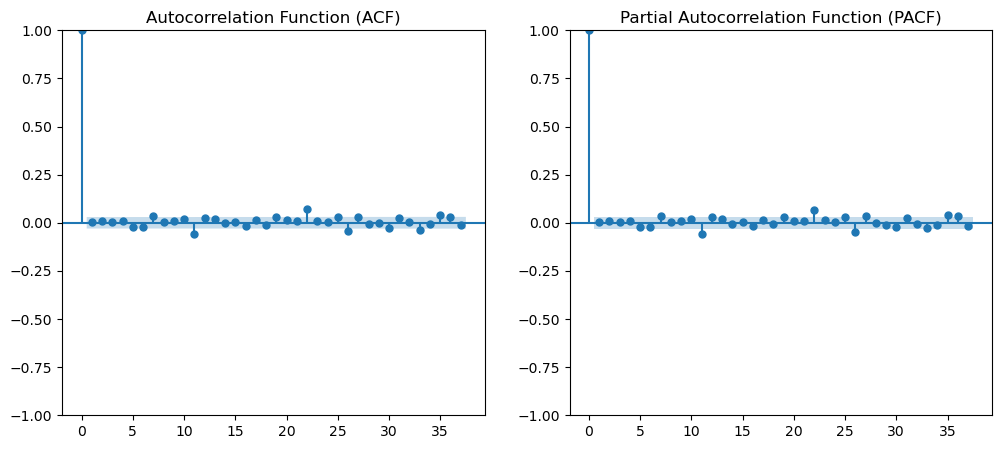

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_acf(df_1['Close_diff'].dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(df_1['Close_diff'].dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA

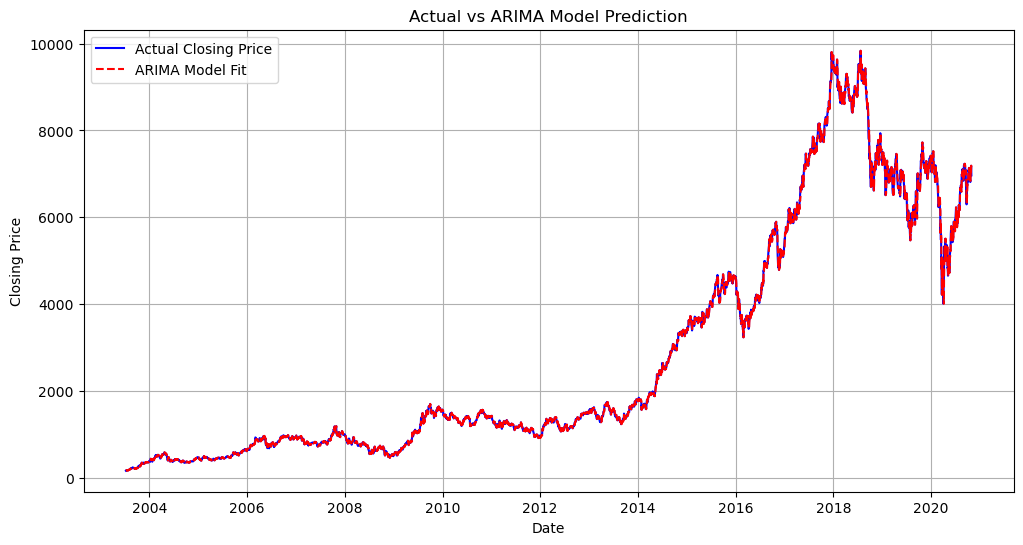

In [45]:
from sklearn.metrics import mean_absolute_percentage_error

# Define ARIMA model (p, d, q) based on ACF/PACF analysis
p, d, q = 1, 1, 1  # ARIMA(1,1,1) as an initial choice

# Fit the ARIMA model
model = ARIMA(df_1['Close'], order=(p, d, q))
model_fit = model.fit()

# Forecast next 15 observations
forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

# Compute MAPE for model evaluation
df_1['Predicted_Close'] = model_fit.fittedvalues  # In-sample predictions
mape = mean_absolute_percentage_error(df_1['Close'].iloc[1:], df_1['Predicted_Close'].iloc[1:]) * 100

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['Close'], label='Actual Closing Price', color='blue')
plt.plot(df_1['Date'].iloc[1:], df_1['Predicted_Close'].iloc[1:], label='ARIMA Model Fit', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs ARIMA Model Prediction')
plt.legend()
plt.grid()
plt.show()

In [47]:
df_1

,Date,Open,High,Low,Close,Volume,Close_diff,Predicted_Close
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,NaN,0.000000
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,2.70,164.304928
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,6.35,167.021392
3,2003-07-12,174.25,179.25,174.25,177.95,5982324,4.60,173.406836
4,2003-07-13,200.00,200.00,173.00,176.20,6173689,-1.75,178.019441
...,...,...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361,-48.45,7104.841234
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819,103.60,7055.570193
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177,27.65,7159.613181
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853,-68.35,7187.064437


In [71]:
mape

2.5226101973637944

In [73]:
forecast

4305    6964.307647
4306    6963.724706
4307    6963.321288
4308    6963.042107
4309    6962.848903
4310    6962.715199
4311    6962.622670
4312    6962.558637
4313    6962.514323
4314    6962.483656
4315    6962.462434
4316    6962.447747
4317    6962.437583
4318    6962.430549
4319    6962.425682
Name: predicted_mean, dtype: float64

In [75]:
Accuracy=100-mape

In [77]:
Accuracy

97.47738980263621

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0, 1))
df_1['Close_Scaled'] = scaler.fit_transform(df_1[['Close']])

# Create sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30

X, y = create_sequences(df_1['Close_Scaled'].values, SEQ_LENGTH)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten

# Build the CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


E:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 28, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,757 (174.83 KB)

 Trainable params: 44,757 (174.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 2.5106e-04 - val_loss: 0.0017
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 3.4900e-04 - val_loss: 0.0020
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 1.8414e-04 - val_loss: 0.0026
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 2.2329e-04 - val_loss: 0.0019
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.7179e-04 - val_loss: 0.0015
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 2.0224e-04 - val_loss: 0.0013
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 1.6406e-04 - val_loss: 0.0012
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.8716e-04 - val_loss: 0.0013
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 2.0196e-04 - val_loss: 0.0015
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 1.5785e-04 - val_loss: 0.0015
